In [1]:
from scipy.integrate import odeint
from numpy import *
from matplotlib.pyplot import *
from scipy import *

sys.path.append('../scripts')
from opsine_model_utils.utils import n_pulse
from opsine_model_utils.models import ode_model_generic

#from sympy import *

%matplotlib inline

TEST = True # set to true to enable function tests

# Activation dynamics

## Overly (?) simplistic idea

Marco PASCUCCI october'15 (from Benoît C. FORGET april '15)

## A 2 level model

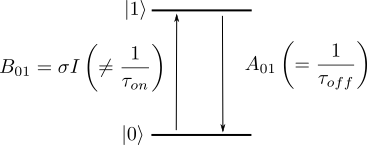

In [2]:
from IPython.display import Image
Image(filename='figures/2levels.png')

(? Use A when light is OFF, use B when light is on?)
There is an ERROR on the index of A. It should be
$$ A_{10} $$

The rate equations are :

\begin{align}
\frac{d |0\rangle}{dt} & = -B_{01}|0\rangle + A_{10}|1\rangle  \\
\frac{d |1\rangle}{dt} & = B_{01}|0\rangle - A_{10}|1\rangle 
\end{align}

We can replace the second equation with the conservation :
$$|0\rangle + |1\rangle  = 1 $$

In steady state :

$$ \frac{d |0\rangle}{dt} = 0 \quad\to\quad -B_{01}\left(1-|1\rangle\right) + + A_{10}|1\rangle = 0 $$

$$ |1\rangle_{ss} = \frac{B_{01}}{B_{01}+A_{01}} $$

## For a simple 2-levels model

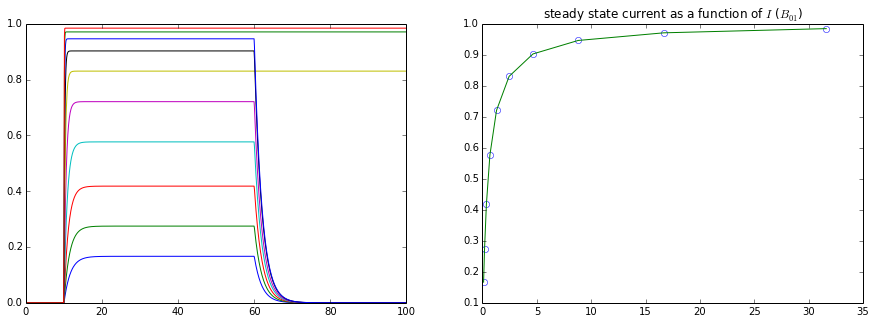

In [2]:
A10 = 0.5                   # transition rate from 1 to 0
B01s=logspace(-1,1.5,10)    # list of transition rates from state 0 to state 1
                            # this coefficient is proportional to the beam intensity
    
t  = linspace(0,100,1000)   # time aray
y0 = array([1.,0.])         # INITAL STATE : Only S0 is initially populated


# transition coefficients matrice when light is OFF
k_off = zeros((2,2))
k_off[1,0] = A10

# transition coefficients matrice when light is ON
k_on = zeros((2,2))
k_on[1,0] = A10


Iss = empty((len(B01s),1))  # list of system solution

figure(figsize=(15,5))

for i,B01 in enumerate(B01s):
    k_on[0,1] = B01   # current value of B01 (read: of intensity)
    v = odeint(ode_model_generic,y0,t,(k_off,k_on))   # solve the two level system
    subplot(121), plot(t,v[:,1])
    Iss[i] = v[len(t)/2,1]        # store the plateau value (at t=50)
    
steady_state_current = B01s/(A10+B01s)   # steady state current (analitically calculated)

subplot(122),plot(B01s,Iss,'o',fillstyle=u'none')   # plot the plateau values
# title('Solution for different values of $I$ ($B_{01}$)')
subplot(122),plot(B01s,steady_state_current,'-')    # plot the steady state current (analytical solution)
title(r'steady state current as a function of $I$ ($B_{01}$)')

show()

No "overshoot" of the steady state current value (left).

This steady-state current shows a typical saturation curve (right).

Ici on a une solution analytique si l'intensité (donc $B_{01}$) est constante:

$$ \frac{d |1\rangle}{dt} = B_{01}\left(1-|1\rangle\right) - A_{10}|1\rangle = B_{01} - \left(B_{01}+A_{01}\right) |1\rangle   $$

On trouve facilement :

$$ |1\rangle = \left\{
            \begin{array}{l}
                |1\rangle_{ss}(t) = \left(1-e^{-(B_{01}+A_{10})t} \right) \\
                |1\rangle (t) = e^{-A_{10}t} \mbox{ when light off}
            \end{array} \right.    
$$


We can plot this analythical solution against the numerical solution:

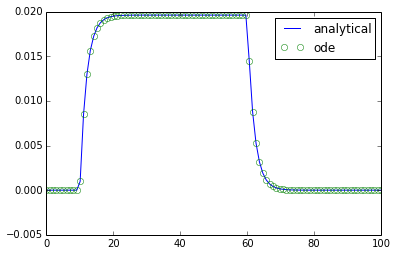

In [4]:
from opsine_model_utils.models import *
B01=0.01;

t  = linspace(0,100,100)   # time aray
during_pulse = where( (t > 10) & (t < 60) )
after_pulse = where( t >= 60)

y0 = array([1.,0.])         # INITAL STATE : Only S0 is initially populated


# transition coefficients matrices
k_off = zeros((2,2))
k_off[1,0] = A10

k_on = zeros((2,2))
k_on[1,0] = A10
k_on[0,1] = B01

Iss=B01/(A10+B01)   # steady state current

analyt = zeros(shape(t))
analyt[during_pulse] = Iss*( 1.0 - exp(-(A10+B01)*(t[during_pulse] - 10.0) ) )
analyt[after_pulse] = Iss*exp(-A10*(t[after_pulse]-60.0))

# print(A10)
v=odeint(ode_model_generic,y0,t,(k_off,k_on))

plot(t,analyt,t,v[:,1],'o',fillstyle=u'none')
legend(['analytical', 'ode']);

## For a 3-levels model

Things get more complicated.

We try to simplify the model by not permitting some transitions

## A 3 level model (inactive state)

In [5]:
def ode_model(y,t):
    
    dy=array([  A20*(1-y[0]-y[1]) + A10*y[1] - B01*n_pulse(t)*y[0],
                B01*n_pulse(t)*y[0] - A10*y[1] - A12*y[1] ,
                -A20*(1-y[1]-y[0]) +A12*y[1] ])
        
    return dy

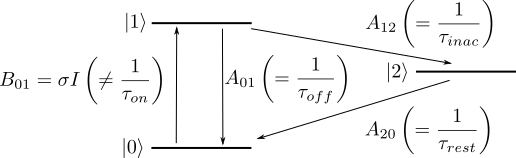

In [6]:
from IPython.display import Image
Image(filename='figures/3levels.png')

The rate equations are :

\begin{align}
    \frac{d |0\rangle}{dt} & = -B_{01}|0\rangle + A_{10}|1\rangle + A_{20}|2\rangle \\
    \frac{d |1\rangle}{dt} & = +B_{01}|0\rangle - A_{10}|1\rangle - A_{12}|1\rangle \\
    \frac{d |2\rangle}{dt} & = +A_{12}|1\rangle -A_{20}|2\rangle
\end{align}    

We can replace the third equation with the conservation :
$$    |0\rangle + |1\rangle + |2\rangle  = 1 $$

In steady state :

$$ \left. \begin{array}{l} 
 \frac{d |0\rangle}{dt} = 0 \\
 \frac{d |0\rangle}{dt} = 0
 \end{array} \right\}
  \quad\to\quad 
 \left\{ \begin{array}{l}  
 -B_{01}|0\rangle + A_{10}|1\rangle + A_{20}\left(1- |0\rangle - |1\rangle \right) = 0 \\
 +B_{01}|0\rangle - A_{10}|1\rangle - A_{12}|1\rangle =0
  \end{array} \right.
 $$    
    
    
$$|1\rangle_{ss} = \frac{B_{01}}{B_{01}\left(1+\frac{A_{12}}{A_{20}}\right)+\left(A_{10}+A_{12}\right)}    $$

this would be the corrisponding transition coefficient matrix when light is ON or OFF
$$k_{ON} = \begin{pmatrix}−k01 & k10 & k20\cr k01 & −k12−k10 & 0\cr 0 & k12 & −k20\end{pmatrix}$$
$$k_{OFF} = \begin{pmatrix} 0 & k10 & k20\cr 0 & −k12−k10 & 0\cr 0 & k12 & −k20\end{pmatrix}$$

it can be solved analytically. The calculation are quite long though. The solution for the Open State (1) is:

$$ s = A \, {e}^{ \lambda_1 \, t } + B \, {e}^{ \lambda_2 \,t} +\gamma$$

where all the parameters are function of the transition coefficients and the initial conditions. Their expression is to long and it is not worth displaying them here.


Still a typical saturation curve but different than the the "2 levels" version. 

If $A_{12} \to 0$ (meaning impossible to got to the $|2\rangle$ state) we get the same result as in the 2 level system

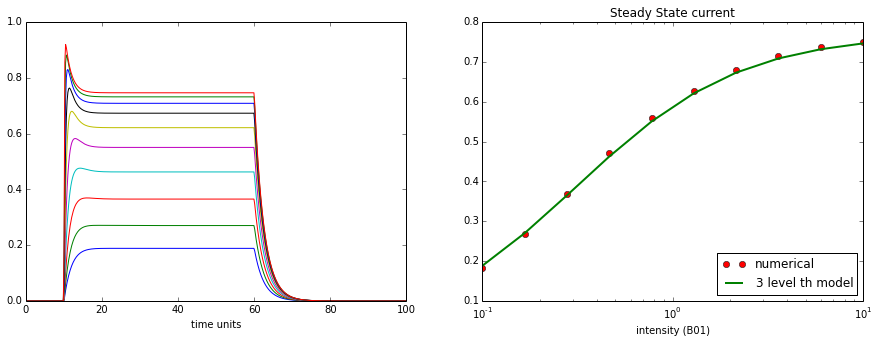

In [7]:
A12=0.15
A10=0.25
A20=0.5
B01s=logspace(-1,1,10)

# time vector
t=linspace(0,100,500)

# initial state
y0=array([1.,0, 0.])

k_off = zeros((3,3))
k_off[1,2] = A12
k_off[1,0] = A10
k_off[2,0] = A20
k_on = copy(k_off)

Imax=[]   # max of the numerical solultion (current peak)
Iss=[]    # numerically evaluated steady state current

figure(figsize=(15,5))
subplot(121)

for B01 in B01s:
    k_on[0,1] = B01
    v=odeint(ode_model_generic,y0,t,(k_off,k_on))
    Imax.append(max(v[:,1]))
    plot(t,v[:,1])
    Iss.append(v[80,1]) 
xlabel("time units");
    
Iss_2Lmodel= B01s/(A10+B01s);                      # Analitical steady state current for 2 levels
Iss_3Lmodel= B01s/((A10+A12)+B01s*(1+A12/A20));    # Analitical steady state current for 3 levels

# subplot(132),plot(B01s,Iss,'o',B01s, Imax,'*', B01s, Iss_2Lmodel, B01s, Iss_3Lmodel ,lw=2)
# legend(['SState','Peak','2 levels model', '3 levels model'],loc=4);
# title(r'S-state current as a function of $I$ ($B_{01}$)');
# xlabel("time units");

subplot(122)
semilogx(
    B01s,Iss,'or',\
    B01s, Iss_3Lmodel , 'g', \
    lw=2)
legend(['numerical','3 level th model'],loc=4);
title("Steady State current");
xlabel("intensity (B01)");


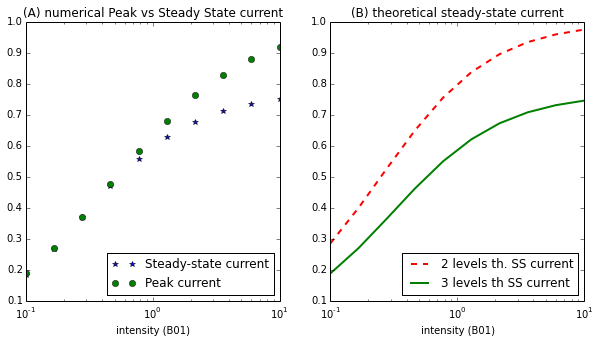

In [8]:
figure(figsize=(10,5))

subplot(121)
semilogx(
    B01s,Iss,'*',\
    B01s, Imax,'o',\
    lw=2)
legend(['Steady-state current','Peak current'],loc=4);
title("(A) numerical Peak vs Steady State current");
xlabel("intensity (B01)");

subplot(122)
semilogx(
    B01s, Iss_2Lmodel, 'r--',\
    B01s, Iss_3Lmodel , 'g', \
    lw=2)
legend(['2 levels th. SS current', '3 levels th SS current'],loc=4);
title("(B) theoretical steady-state current");
xlabel("intensity (B01)");

# subplot(122)
# semilogx(
#     B01s,Iss,'o',\
#     B01s, Imax,'*',\
#     B01s, Iss_2Lmodel/Iss_2Lmodel[0]*Iss_3Lmodel[0],\
#     B01s, Iss_3Lmodel\
#     ,lw=2) ;  
# legend(['Steady-state current','Peak current','2 levels th. SS current (norm)', '3 levels th SS current'],loc=4);

I have wrote a script to solve the problem analitically (geometrically).

In [9]:
from opsine_model_utils.analytical_solver import PulsedSolver

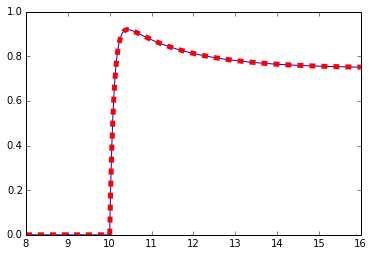

In [10]:
    t_zoom = linspace(8,16,1000)
    s = PulsedSolver(k_on,k_off,array([1,0,0]),t_zoom)
    v = odeint(ode_model_generic,y0,t_zoom,(k_off,k_on))
    plot(t_zoom,v[:,1], linewidth='1');
    plot(t_zoom, s.solution()[1],'--r', linewidth='5');


### peak and steady-state currents
(A):

$I_{peak} \geq I_{ss}$ of course. The overshoot is a signature (?) of inactivation.

The difference increases with $I$ (or $B_{01}$).


(B):

The theoretical steady state current is lower for a 3 level system because of inactivation.

The difference with the "2 levels" is important from the start.

## Behaviour of the numerical solution (3 levels)
We compare the decaying phase (when the light pulse turns off) of the 2 vs 3 levels systems:


$$ 
    \begin{array}{l}
    I(t) = I_0 e^{-\left(A_{10}+A_{12}\right)t} &\mbox{ 3 levels} \\
    I(t) = I_0 e^{-\left(A_{10}\right)t} &\mbox{ 2 levels}
    \end{array}
$$

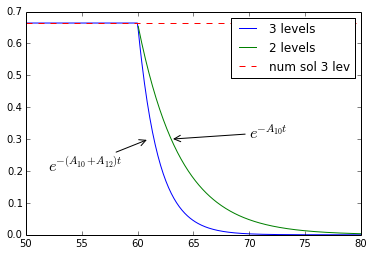

In [123]:
t = linspace(0,80,1000)
analyt = zeros(shape(t))

# coefficients
B01=2.01;

# pulse
tstart = 10
during_pulse = where( (t>tstart) & (t<60) )
after_pulse  = where( t>= 60)

# steady state solutions
Iss  = B01/((A10+A12)+B01*(1+A12/A20));   # 3 levels steady state current
Iss2 = B01/(A10+A12+B01)                  # 2 levels steady state current 

# This is the rising part, I don't know how this was calculated
# It is there to have a plateau, I don't like it
# analyt[during_pulse] = Iss * ( 1.0 - exp(-(A10+A12+B01)*( t[during_pulse]-tstart) ) )

# the plateau
analyt[during_pulse] = Iss
# analitical solution of the 3 level system for B01 = 0
analyt[after_pulse]  = Iss * exp( -(A10+A12)*(t[after_pulse]-60.0) )

analyt_2_levelse = Iss * exp( -(A10)*(t[after_pulse]-60.0))

v= odeint( ode_model,y0,t )

plot(t,analyt,\
     t[after_pulse], analyt_2_levelse,
     t,v[:,1],'--')

legend(['3 levels', '2 levels', 'num sol 3 lev'],loc=1);

annotate(r'$e^{-A_{10}t}$', xy=(63, 0.3), xytext=(70, 0.3), size=16,
            arrowprops=dict(arrowstyle='->'))

annotate(r'$e^{-\left(A_{10}+A_{12}\right)t}$', xy=(61, 0.3), xytext=(52, 0.2), size=16,
            arrowprops=dict(arrowstyle='->'));

axis([50,80,0,0.7]);

Now for the rising phase I want to compare the numerical solution with:
$$1-e^{-\left(A_{10}+A_{12}+B_{01}\right)t}$$

''

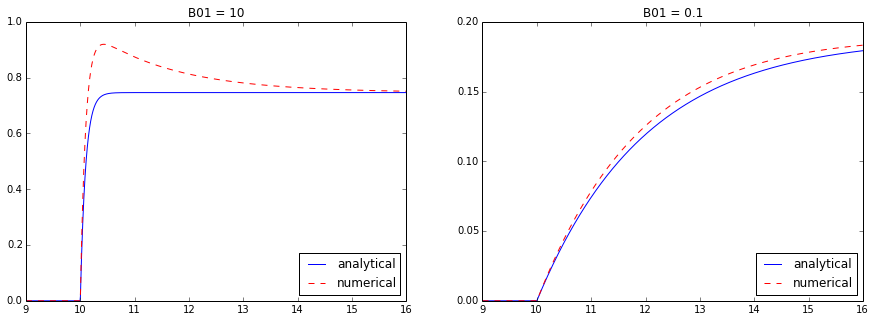

In [72]:
t = linspace(9,16,1000)
analyt=zeros(shape(t))
during_pulse=where((t>10) & (t<60))
after_pulse=where( t>= 60)


B01=10;
Iss=B01/((A10+A12)+B01*(1+A12/A20));
Iss2=B01/(A10+A12+B01)
analyt[during_pulse]=Iss*(1.0-exp(-(A10+A12+B01)*(t[during_pulse]-10.0)))
analyt[after_pulse]=Iss*exp(-(A10+A12)*(t[after_pulse]-60.0))
v = odeint(ode_model,y0,t)

figure(figsize=(15,5));
subplot(1,2,1);
plot(t,analyt);
plot(t,v[:,1],'r--');
legend(['analytical','numerical'],loc=4);
title("B01 = {}".format(B01));

B01=0.10;
Iss=B01/((A10+A12)+B01*(1+A12/A20));
Iss2=B01/(A10+A12+B01)
analyt[during_pulse]=Iss*(1.0-exp(-(A10+A12+B01)*(t[during_pulse]-10.0)))
analyt[after_pulse]=Iss*exp(-(A10+A12)*(t[after_pulse]-60.0))
v = odeint(ode_model,y0,t)

subplot(1,2,2);
plot(t,analyt);
plot(t,v[:,1],'r--');
legend(['analytical','numerical'],loc=4);
title("B01 = {}".format(B01));

#annotate(r'$1-e^{-(A_{10}+B_{01})t}$',
#         xy=(18, 0.18), xytext=(25, 0.15),
#         size=16,
#         arrowprops=dict(arrowstyle='->'))

#annotate(r'$1-e^{-\left(A_{10}+A_{12}+B_{01}\right)t}$', xy=(16, 0.19), xytext=(-0.5, 0.21), size=16,
#            arrowprops=dict(arrowstyle='->'));
;

Note that
$$1-e^{-\left(A_{10}+A_{12}+B_{01}\right)t}$$
is similar to the numerical solution ONLY for low values of B01